[nltk_data] Downloading package punkt to c:\Users\Admin\AppData\Local\
[nltk_data]     Programs\Python\Python311\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\Users\Admin\AppData\Lo
[nltk_data]     cal\Programs\Python\Python311\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to c:\Users\Admin\AppD
[nltk_data]     ata\Local\Programs\Python\Python311\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Model Accuracy: 95.47%
Confusion Matrix:
[[ 136  193]
 [  81 5633]]


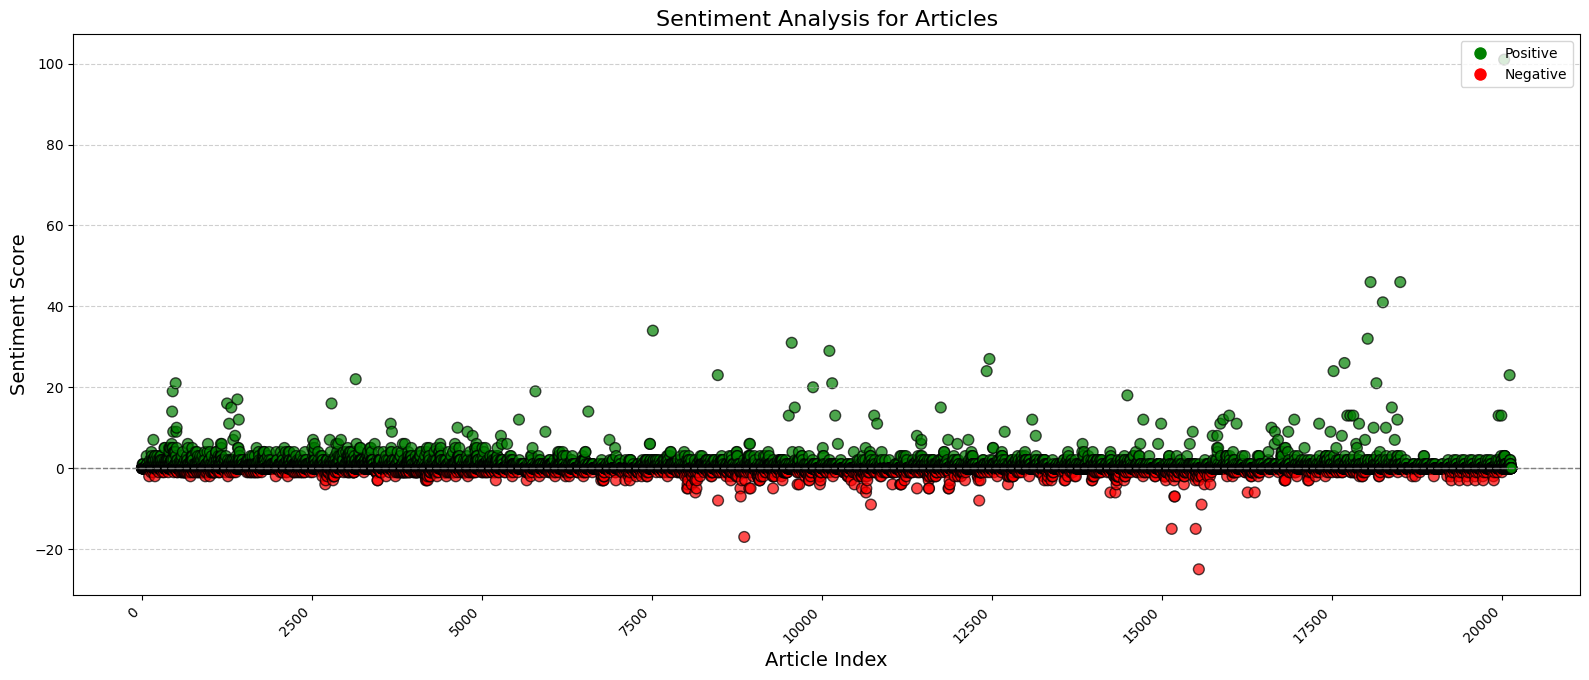

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

# Sentiment Lexicon (Using NLTK's opinion lexicon)
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to compute sentiment
def compute_sentiment(text):
    words = word_tokenize(text)
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    return positive_count - negative_count

# Function to read the text file and split it into individual lines or articles
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip().split('\n')  # Split by lines or sentences
    return text

# Read the text file (replace 'yourfile.txt' with the actual file path)
file_path = "F:/Users/Admin/Minor Project/ScrappedData_CNBC.txt"  # Update with the correct file path
articles = read_file(file_path)

# Initialize a list to store sentiment data
sentiment_data = []
labels = []  # Will be used for binary sentiment classification (positive or negative)

# Loop through articles and compute sentiment
for i, article_text in enumerate(articles, 1):
    date = f"Article-{i}"
    
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(article_text) if word.isalpha() and word.lower() not in stop_words]
    text_clean = ' '.join(words)
    
    # Compute sentiment score
    sentiment_score = compute_sentiment(text_clean)
    sentiment_data.append([date, text_clean, sentiment_score])
    
    # Assign binary labels (positive or negative sentiment)
    if sentiment_score >= 0:
        labels.append(1)  # Positive sentiment
    else:
        labels.append(0)  # Negative sentiment

# Convert the sentiment data to a DataFrame
df = pd.DataFrame(sentiment_data, columns=["Date", "Article", "Sentiment_Score"])

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Article']).toarray()  # Transform the article text to feature vectors
y = labels  # Sentiment labels (positive or negative)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sentiment visualization - Enhanced Scatter Plot
plt.figure(figsize=(16, 8))  # Increase figure size for better readability

# Use colors based on sentiment score (green for positive, red for negative)
colors = ['green' if score >= 0 else 'red' for score in df['Sentiment_Score']]

# Plotting sentiment scores with article indices on the x-axis
plt.scatter(range(len(df)), df['Sentiment_Score'], c=colors, alpha=0.7, edgecolors='k', s=60)

# Add a horizontal line at y=0 for clear separation of sentiments
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Set x-axis ticks to show only a few labels
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both', nbins=10))

# Adding labels
plt.xlabel('Article Index', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.title('Sentiment Analysis for Articles', fontsize=16)

# Rotate the x-axis labels more for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better visualization
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add a legend to indicate colors
positive_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Positive')
negative_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Negative')
plt.legend(handles=[positive_patch, negative_patch], loc='upper right')

# Adjust layout to prevent clipping (increase bottom space)
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Extra space at the bottom for x-axis labels

# Show the plot
plt.show()

[nltk_data] Downloading package punkt to c:\Users\Admin\AppData\Local\
[nltk_data]     Programs\Python\Python311\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\Users\Admin\AppData\Lo
[nltk_data]     cal\Programs\Python\Python311\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to c:\Users\Admin\AppD
[nltk_data]     ata\Local\Programs\Python\Python311\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Model Accuracy: 53.12%
Confusion Matrix:
[[13  2]
 [43 38]]


[*********************100%***********************]  2 of 2 completed


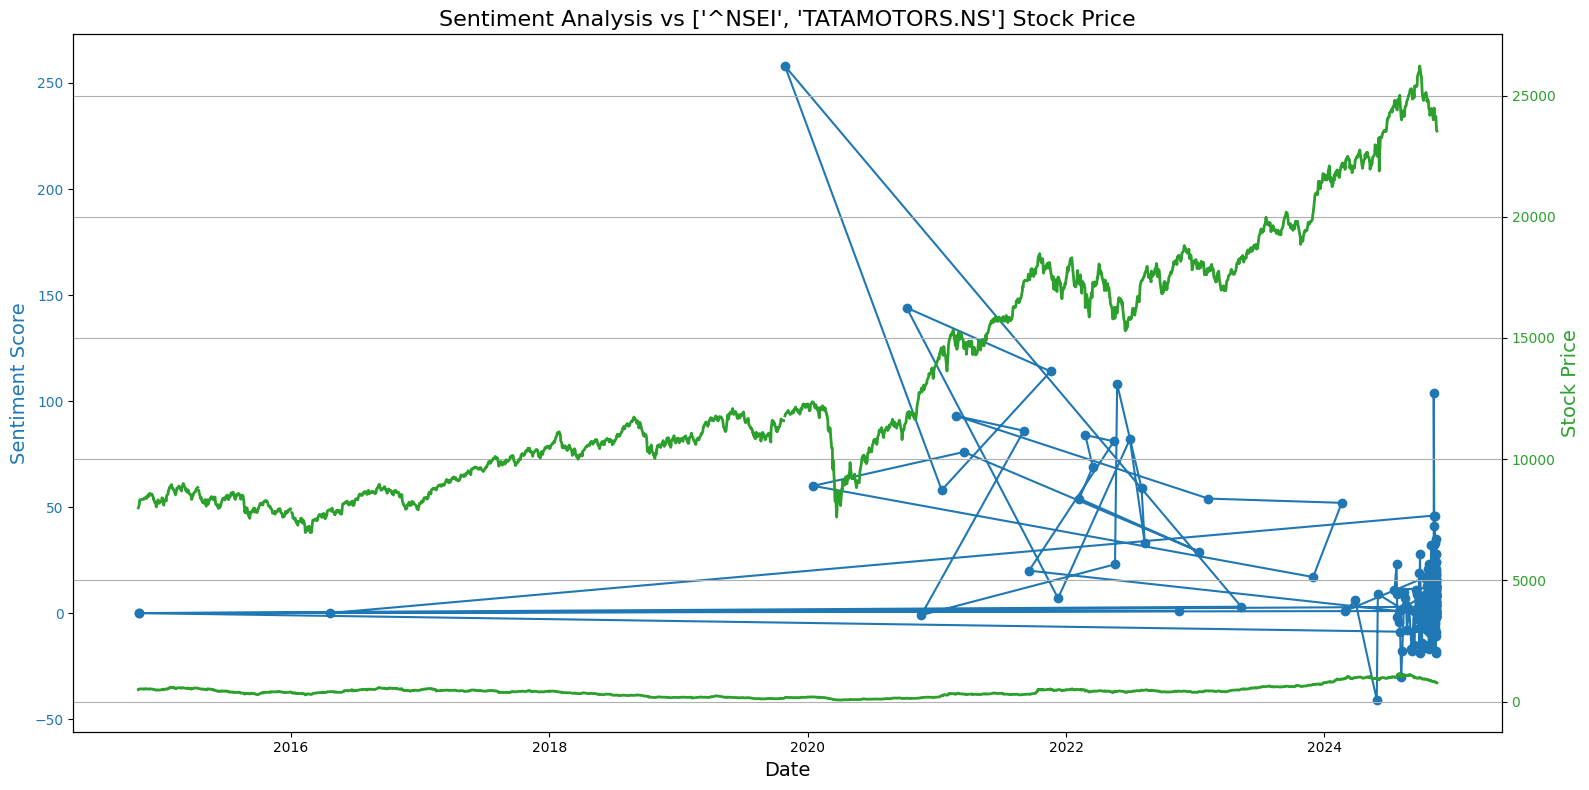

In [2]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')

# Sentiment Lexicon (Using NLTK's opinion lexicon)
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to compute sentiment
def compute_sentiment(text):
    words = word_tokenize(text)
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    return positive_count - negative_count

# Function to read the text file and extract articles with their dates
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Regular expression to extract articles
    article_pattern = re.compile(r'Parsing Article (\d+)(.*?)DATE:\s*(\d{4}-\d{2}-\d{2})', re.DOTALL)
    articles = []
    
    # Find all articles
    for match in article_pattern.finditer(content):
        article_number = match.group(1)
        article_text = match.group(2).strip()  # Extract text before DATE
        article_date = match.group(3)  # Extract the date
        
        articles.append((article_number, article_text, article_date))
    
    return articles

# Read the text file (replace 'yourfile.txt' with the actual file path)
file_path = "F:/Users/Admin/Minor Project/ScrappedData_CNBC.txt"  # Update with the correct file path
articles = read_file(file_path)

# Initialize a list to store sentiment data
sentiment_data = []
labels = []  # Will be used for binary sentiment classification (positive or negative)

# Loop through articles and compute sentiment
for article_number, article_text, article_date in articles:
    # Parse the date
    try:
        date = datetime.strptime(article_date, "%Y-%m-%d")
    except ValueError:
        date = None  # In case of invalid date format
    
    # Remove punctuation and stopwords from the text
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(article_text) if word.isalpha() and word.lower() not in stop_words]
    text_clean = ' '.join(words)
    
    # Compute sentiment score
    sentiment_score = compute_sentiment(text_clean)
    sentiment_data.append([date, text_clean, sentiment_score])
    
    # Assign binary labels (positive or negative sentiment)
    if sentiment_score >= 0:
        labels.append(1)  # Positive sentiment
    else:
        labels.append(0)  # Negative sentiment

# Convert the sentiment data to a DataFrame
df = pd.DataFrame(sentiment_data, columns=["Date", "Article", "Sentiment_Score"])

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Article']).toarray()  # Transform the article text to feature vectors
y = labels  # Sentiment labels (positive or negative)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Fetch stock data (for example, NIFTY 50 index, or any other stock ticker)
stock_ticker = ["^NSEI","TATAMOTORS.NS"]  # NIFTY 50 Index
start_date = df['Date'].min() - pd.Timedelta(days=5)
end_date = df['Date'].max() + pd.Timedelta(days=5)

# Download stock data using yfinance
stock_data = yf.download(stock_ticker, start=start_date, end=end_date)

# Plotting the Sentiment and Stock Data together
fig, ax1 = plt.subplots(figsize=(16, 8))

# Sentiment Plot
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Sentiment Score', fontsize=14, color='tab:blue')
ax1.plot(df['Date'], df['Sentiment_Score'], color='tab:blue', label='Sentiment Score', marker='o', linestyle='-', markersize=6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary Y-axis for Stock Data
ax2 = ax1.twinx()
ax2.set_ylabel('Stock Price', fontsize=14, color='tab:green')
ax2.plot(stock_data.index, stock_data['Adj Close'], color='tab:green', label='Stock Price', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add title and grid
plt.title(f"Sentiment Analysis vs {stock_ticker} Stock Price", fontsize=16)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to c:\Users\Admin\AppData\Local\
[nltk_data]     Programs\Python\Python311\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\Users\Admin\AppData\Lo
[nltk_data]     cal\Programs\Python\Python311\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to c:\Users\Admin\AppD
[nltk_data]     ata\Local\Programs\Python\Python311\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Model Accuracy: 53.12%
Confusion Matrix:
[[13  2]
 [43 38]]
Fetching data for ^NSEI...


[*********************100%***********************]  1 of 1 completed


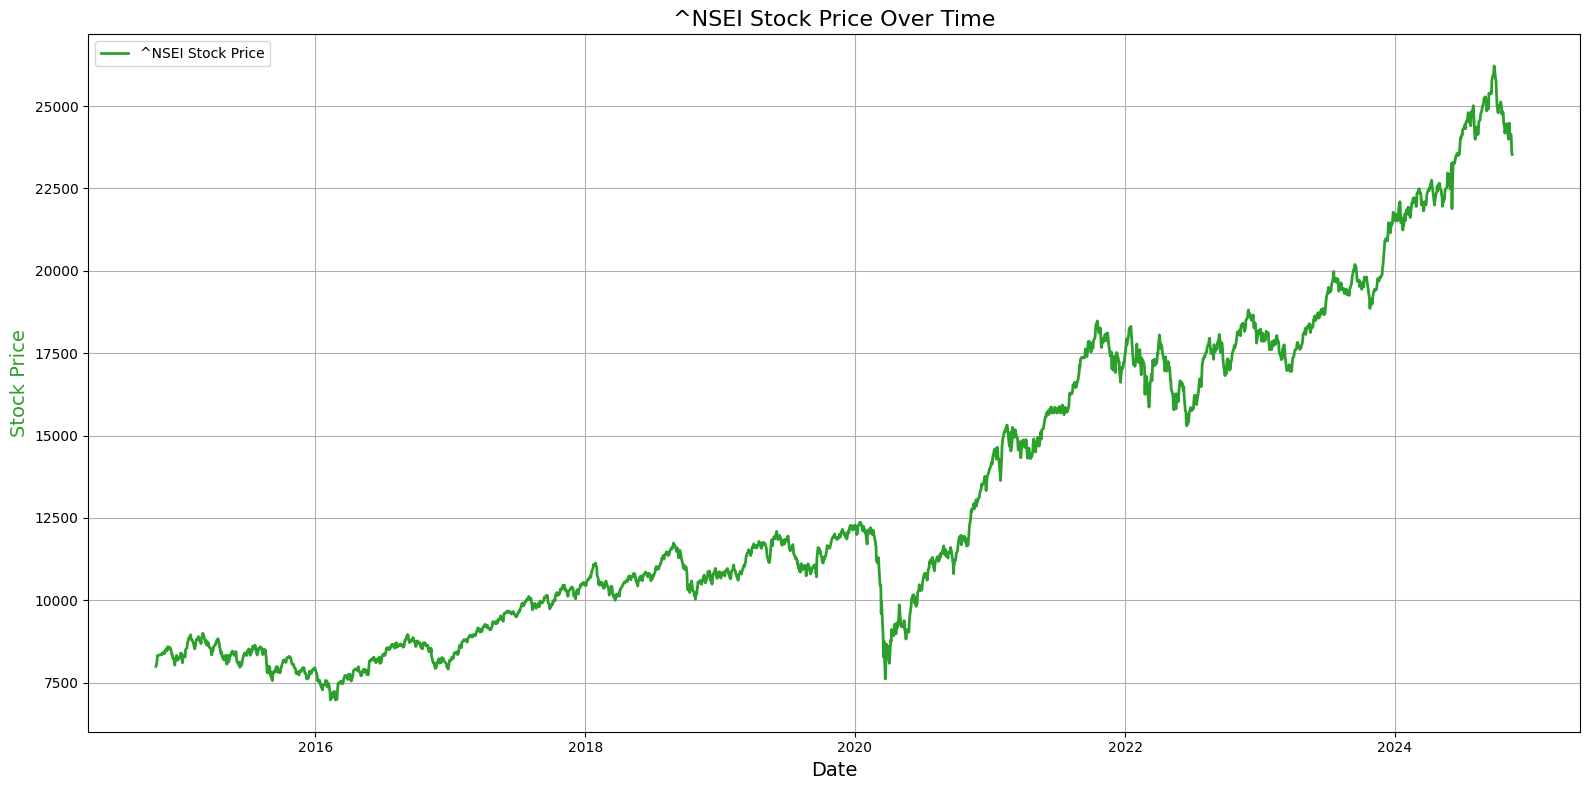

Fetching data for TATAMOTORS.NS...


[*********************100%***********************]  1 of 1 completed


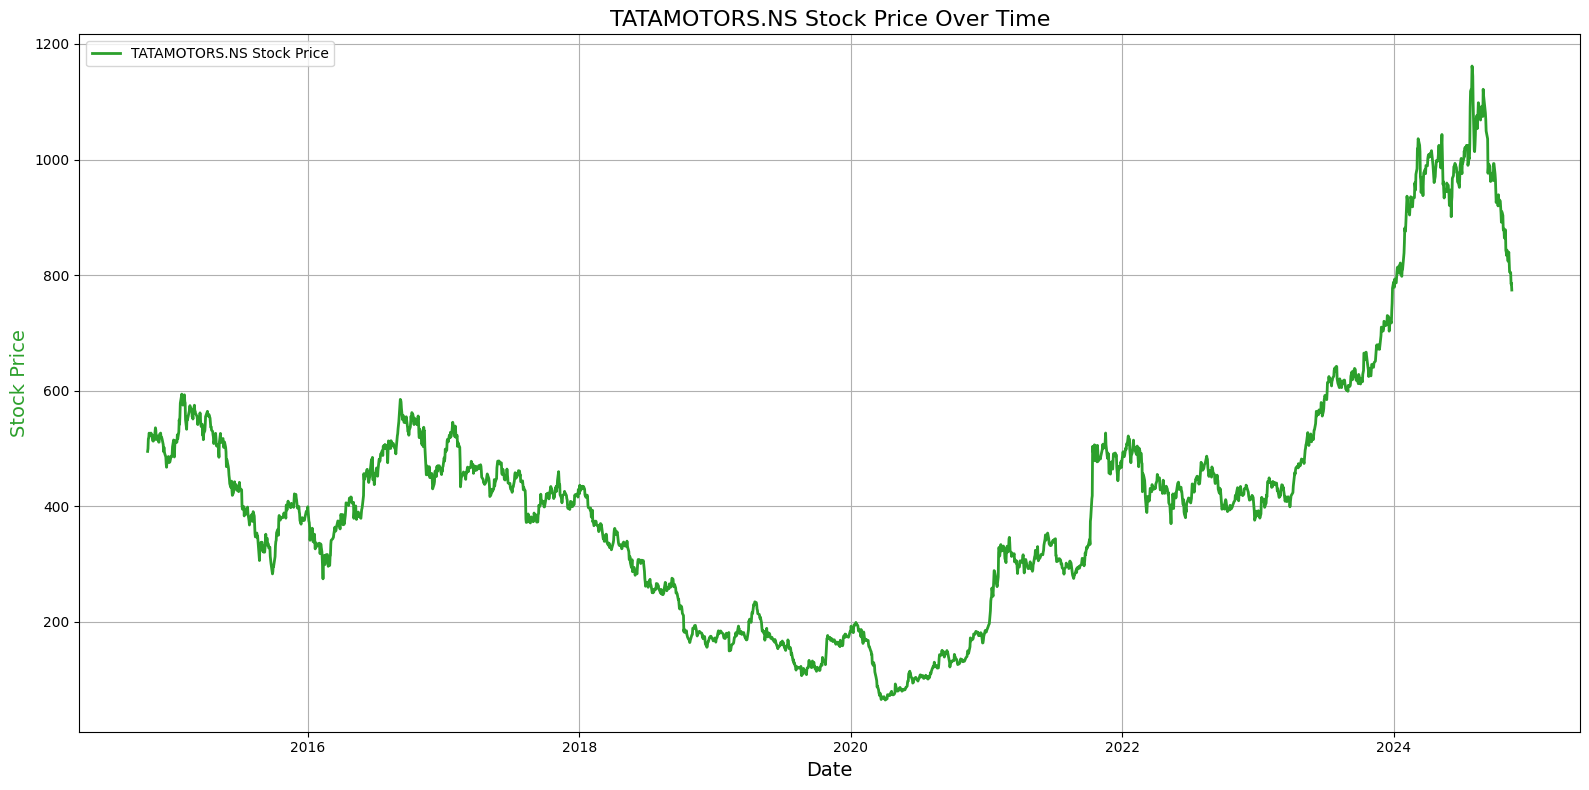

Fetching data for RELIANCE.NS...


[*********************100%***********************]  1 of 1 completed


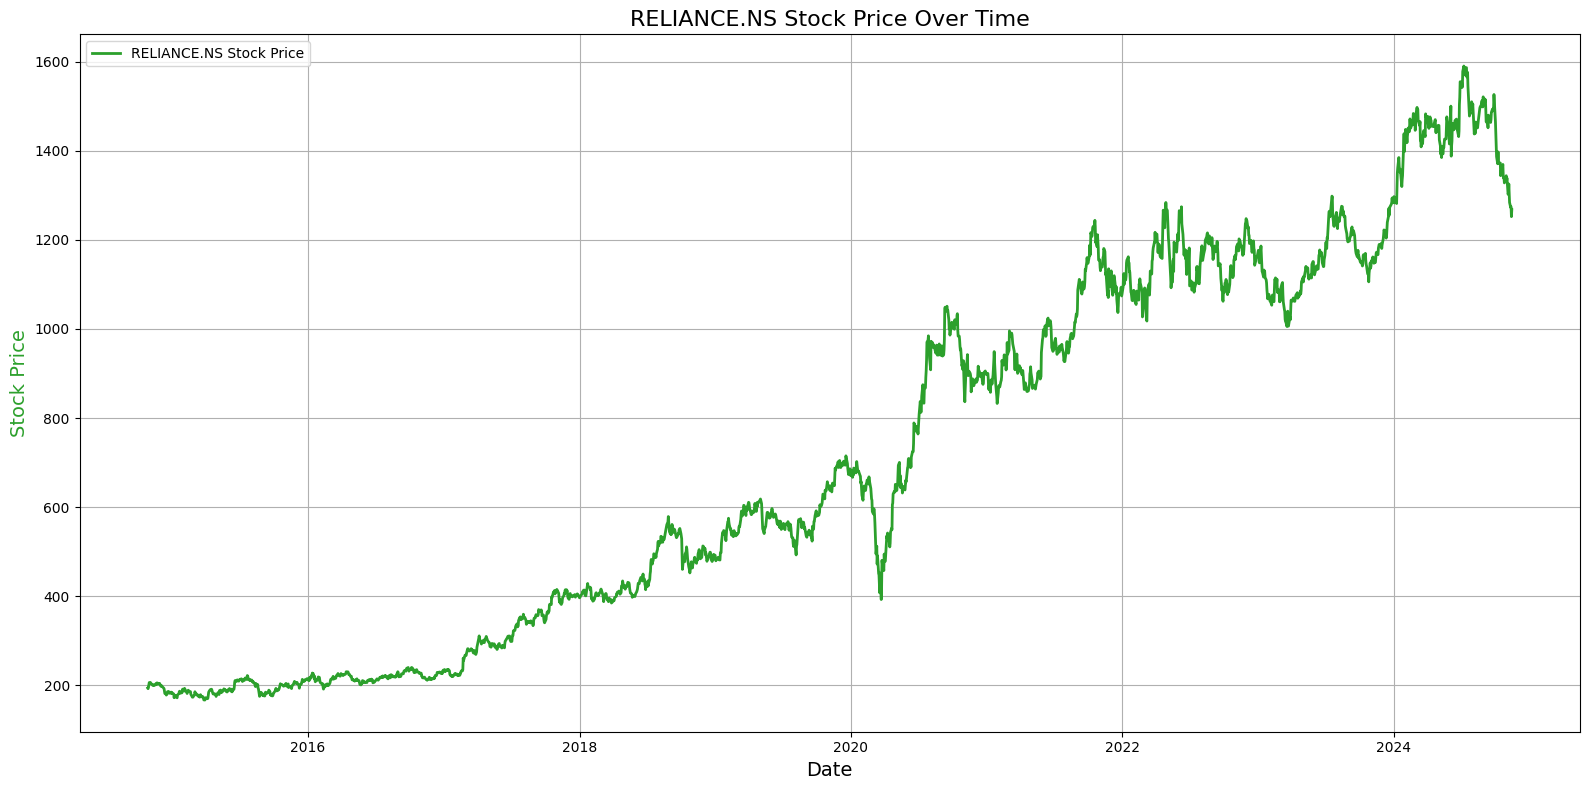

Fetching data for ZOMATO.NS...


[*********************100%***********************]  1 of 1 completed


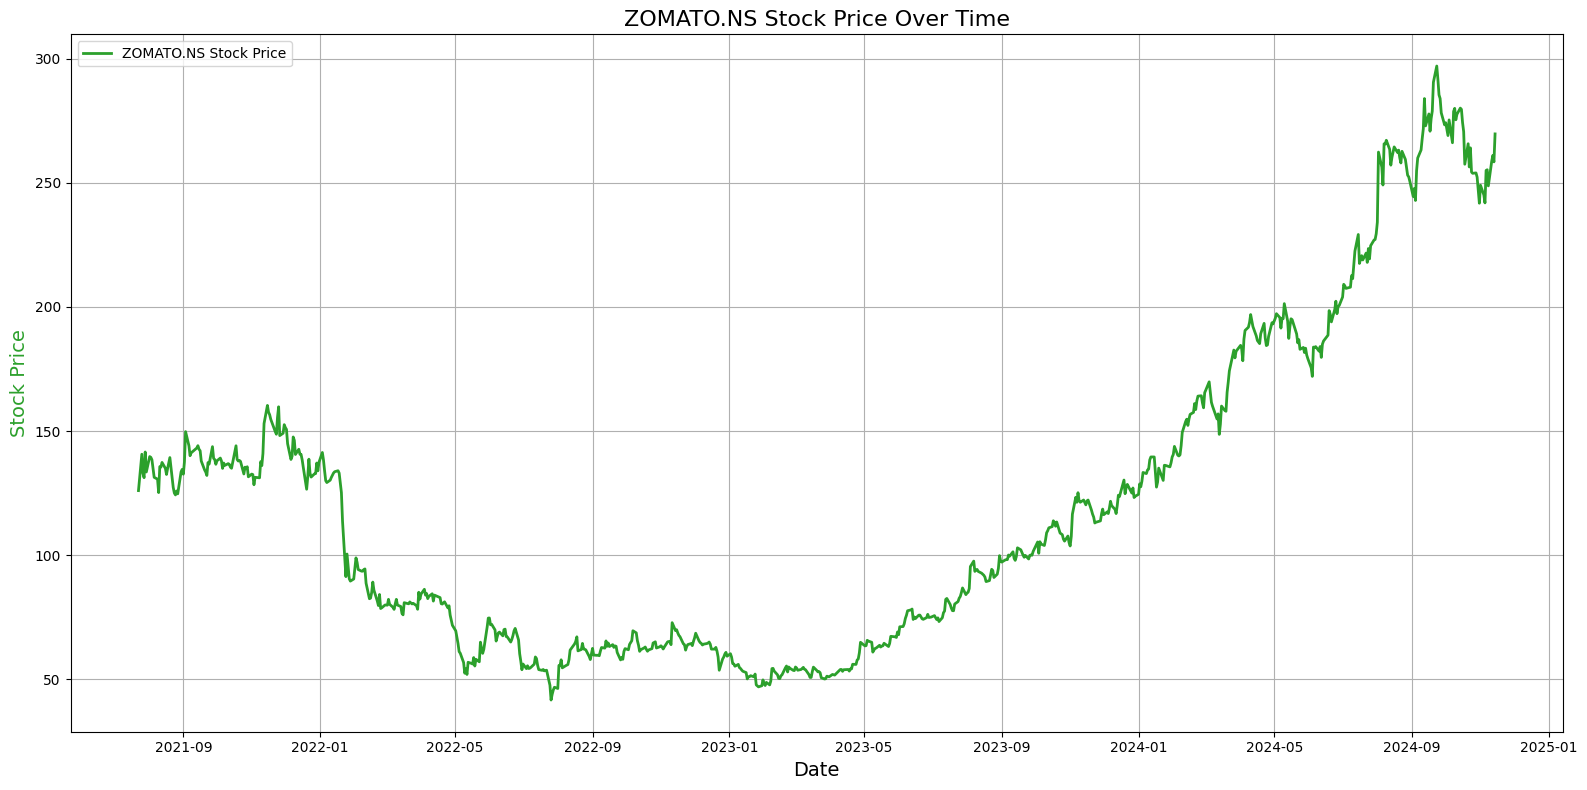

Fetching data for ITI.NS...


[*********************100%***********************]  1 of 1 completed


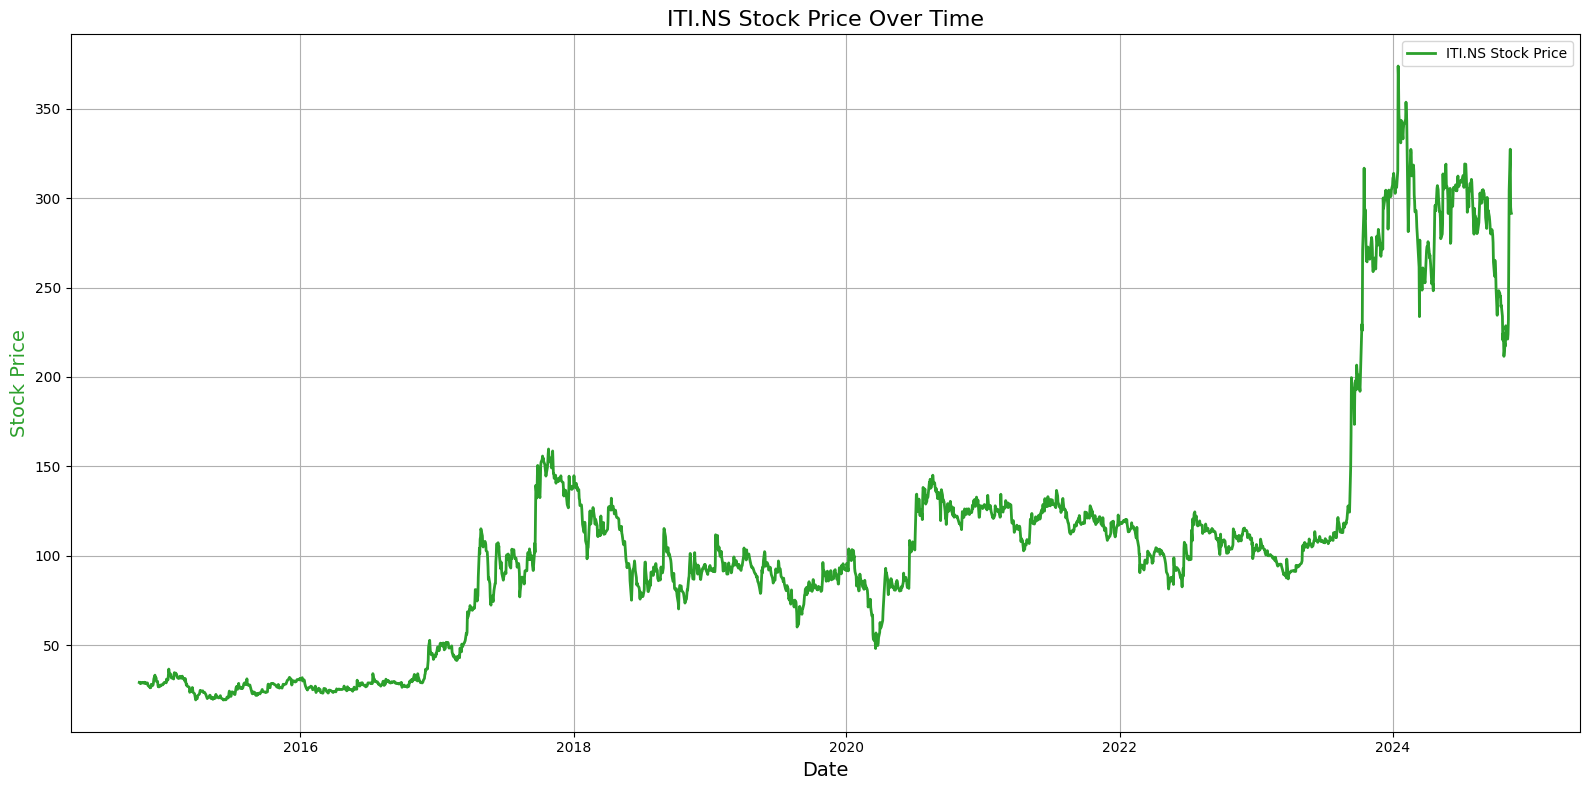

In [6]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')

# Sentiment Lexicon (Using NLTK's opinion lexicon)
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to compute sentiment
def compute_sentiment(text):
    words = word_tokenize(text)
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    return positive_count - negative_count

# Function to read the text file and extract articles with their dates
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Regular expression to extract articles
    article_pattern = re.compile(r'Parsing Article (\d+)(.*?)DATE:\s*(\d{4}-\d{2}-\d{2})', re.DOTALL)
    articles = []
    
    # Find all articles
    for match in article_pattern.finditer(content):
        article_number = match.group(1)
        article_text = match.group(2).strip()  # Extract text before DATE
        article_date = match.group(3)  # Extract the date
        
        articles.append((article_number, article_text, article_date))
    
    return articles

# Read the text file (replace 'yourfile.txt' with the actual file path)
file_path = "F:/Users/Admin/Minor Project/ScrappedData_CNBC.txt"  # Update with the correct file path
articles = read_file(file_path)

# Initialize a list to store sentiment data
sentiment_data = []
labels = []  # Will be used for binary sentiment classification (positive or negative)

# Loop through articles and compute sentiment
for article_number, article_text, article_date in articles:
    # Parse the date
    try:
        date = datetime.strptime(article_date, "%Y-%m-%d")
    except ValueError:
        date = None  # In case of invalid date format
    
    # Remove punctuation and stopwords from the text
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(article_text) if word.isalpha() and word.lower() not in stop_words]
    text_clean = ' '.join(words)
    
    # Compute sentiment score
    sentiment_score = compute_sentiment(text_clean)
    sentiment_data.append([date, text_clean, sentiment_score])
    
    # Assign binary labels (positive or negative sentiment)
    if sentiment_score >= 0:
        labels.append(1)  # Positive sentiment
    else:
        labels.append(0)  # Negative sentiment

# Convert the sentiment data to a DataFrame
df = pd.DataFrame(sentiment_data, columns=["Date", "Article", "Sentiment_Score"])

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Article']).toarray()  # Transform the article text to feature vectors
y = labels  # Sentiment labels (positive or negative)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# List of stock tickers for Nifty50 and Tata Motors
company_tickers = ["^NSEI", "TATAMOTORS.NS","RELIANCE.NS","ZOMATO.NS","ITI.NS"]

# Loop through each ticker for analysis
for stock_ticker in company_tickers:
    print(f"Fetching data for {stock_ticker}...")

    # Fetch stock data using yfinance
    start_date = df['Date'].min() - pd.Timedelta(days=5)
    end_date = df['Date'].max() + pd.Timedelta(days=5)
    
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)

    # Check if stock data is available
    if stock_data.empty:
        print(f"No data found for {stock_ticker}")
        continue

    # Create a new figure for each ticker
    plt.figure(figsize=(16, 8))

    # Plot only the stock prices
    plt.plot(stock_data.index, stock_data['Adj Close'], color='tab:green', label=f'{stock_ticker} Stock Price', linestyle='-', linewidth=2)
    
    # Set plot labels and title
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price', fontsize=14, color='tab:green')
    plt.title(f"{stock_ticker} Stock Price Over Time", fontsize=16)
    plt.grid(True)
    plt.legend()

    # Optimize layout
    plt.tight_layout()

    # Display the plot
    plt.show()

Fetching data for TATAMOTORS.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for RELIANCE.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for ZOMATO.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for ITI.NS...


[*********************100%***********************]  1 of 1 completed


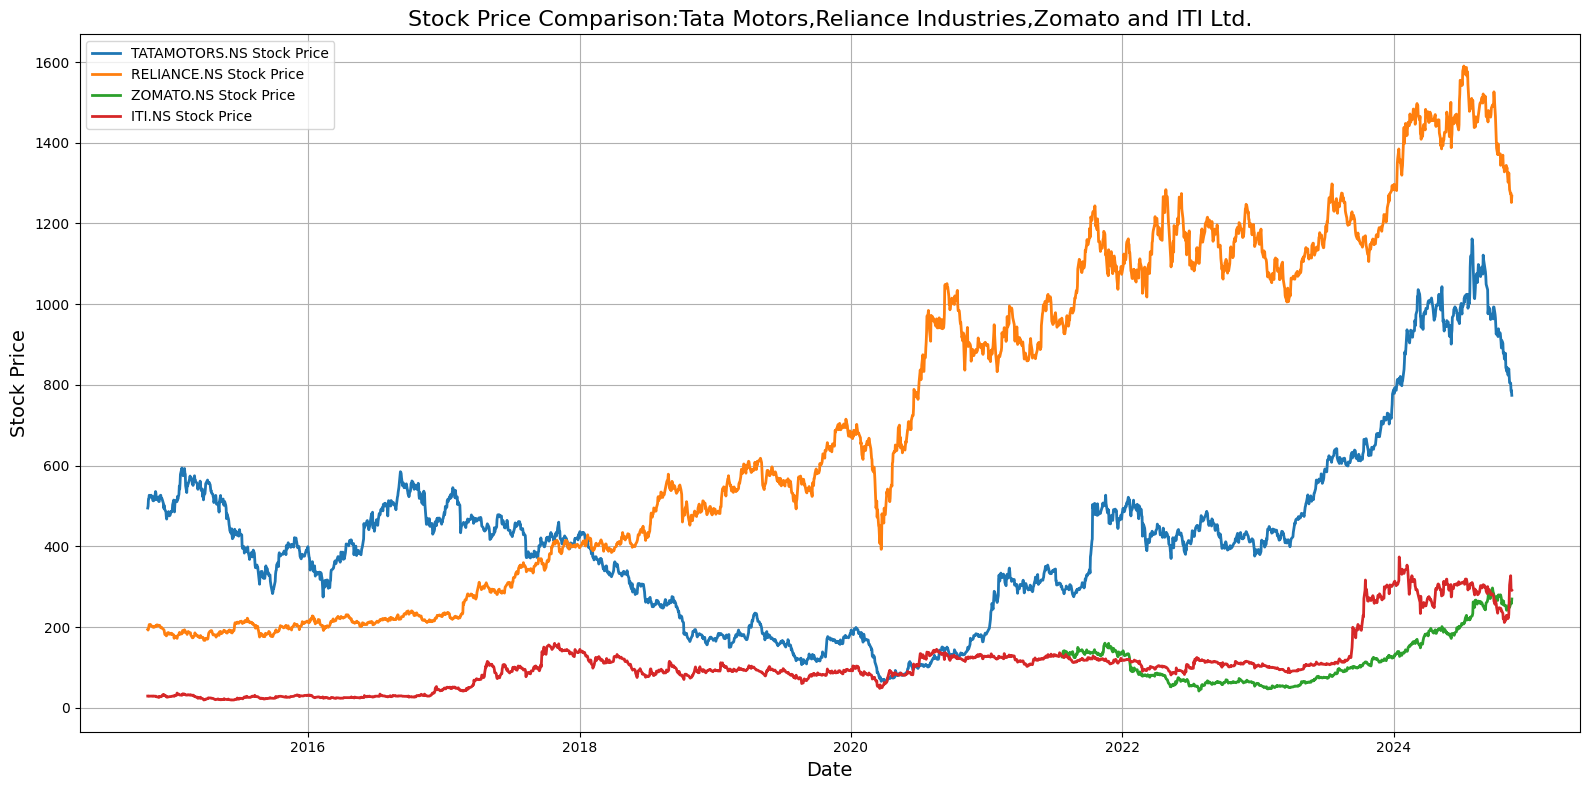

In [7]:
# List of stock tickers for Nifty50, Tata Motors, and Reliance Industries
company_tickers = ["TATAMOTORS.NS", "RELIANCE.NS","ZOMATO.NS","ITI.NS"]

# Initialize a figure for combined plot
plt.figure(figsize=(16, 8))

# Loop through each ticker for analysis and plotting
for stock_ticker in company_tickers:
    print(f"Fetching data for {stock_ticker}...")

    # Fetch stock data using yfinance
    start_date = df['Date'].min() - pd.Timedelta(days=5)
    end_date = df['Date'].max() + pd.Timedelta(days=5)
    
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)

    # Check if stock data is available
    if stock_data.empty:
        print(f"No data found for {stock_ticker}")
        continue

    # Plot the stock prices on the same graph
    plt.plot(stock_data.index, stock_data['Adj Close'], label=f'{stock_ticker} Stock Price', linestyle='-', linewidth=2)

# Set plot labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title("Stock Price Comparison:Tata Motors,Reliance Industries,Zomato and ITI Ltd.", fontsize=16)
plt.grid(True)
plt.legend()

# Optimize layout
plt.tight_layout()

# Display the combined plot
plt.show()
